<a href="https://colab.research.google.com/github/rajendranast012-stack/in-silico-lab1/blob/main/tanimoto%20heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install rdkit
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [14]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import MACCSkeys
from sklearn.cluster import KMeans

# --- Step 1: Load SMILES ---
df = pd.read_excel('/content/maccs.xlsx')  # adjust path
smiles_list = df['SMILES'].tolist()       # Replace 'SMILES' with your column name

# --- Step 2: Generate MACCS fingerprints ---
fps = []
valid_indices = []
for i, smi in enumerate(smiles_list):
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        fp = MACCSkeys.GenMACCSKeys(mol)
        fps.append(fp)
        valid_indices.append(i)

n = len(fps)
print(f"Valid molecules: {n}")

Valid molecules: 187


In [15]:
# --- Step 3: Run K-means clustering ---
# Convert fingerprints to numpy arrays for K-means
fps_array = np.zeros((n, fps[0].GetNumBits()), dtype=int)
for i, fp in enumerate(fps):
    DataStructs.ConvertToNumpyArray(fp, fps_array[i])

# Determine number of clusters (replace 4 with your best k)
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(fps_array)

In [16]:
# --- Step 4: Compute Tanimoto similarity matrix ---
sim_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        sim_matrix[i,j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])

In [17]:
# --- Step 5: Sort molecules by cluster ---
sorted_indices = np.argsort(clusters)
sim_sorted = sim_matrix[np.ix_(sorted_indices, sorted_indices)]

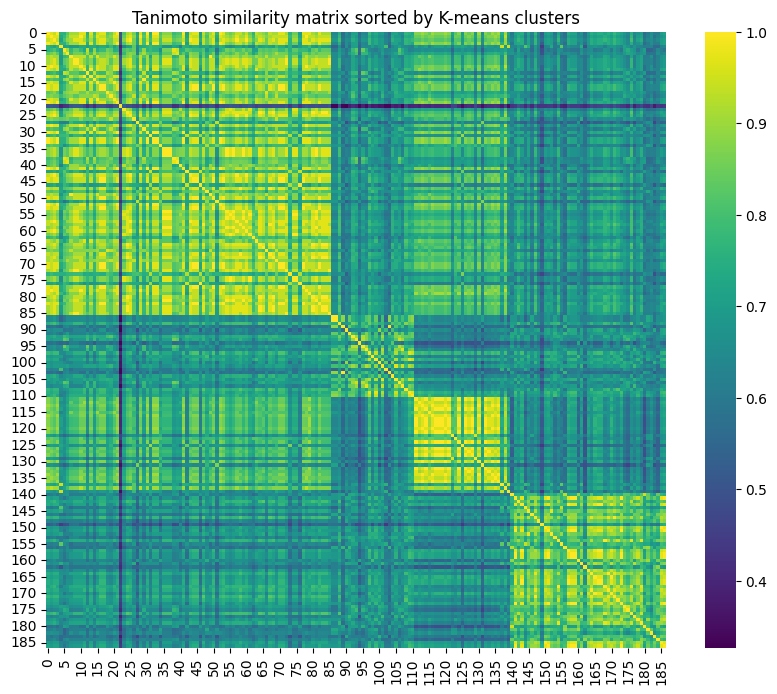

In [19]:
# --- Step 6: Plot heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(sim_sorted, cmap='viridis')
plt.title('Tanimoto similarity matrix sorted by K-means clusters')
plt.show()